# Homework 3 (Part II)

Aprendizagem 2023/2024 - LEIC @ IST 

Group #24
- Daniel Nunes (Nº 103095)
- Gonçalo Alves (Nº 103540)

## Data importing and preparation

In [1]:

import pandas as pd

# Load the wine quality dataset from the CSV file
data = pd.read_csv("winequality-red.csv", delimiter=';')

# Extract features (X) and the target variable (y)
X = data.drop("quality", axis=1)
y = data["quality"]

display(data)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Using a 80-20 training-test split with a fixed seed (random_state=0)

In [2]:
from sklearn.model_selection import train_test_split

random_seeds = range(1, 11) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Exercise 1

Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation 
on all nodes, and early stopping with 20% of training data set aside for validation. All 
remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as 
default. Plot the distribution of the residues (in absolute value) using a histogram.

/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: 

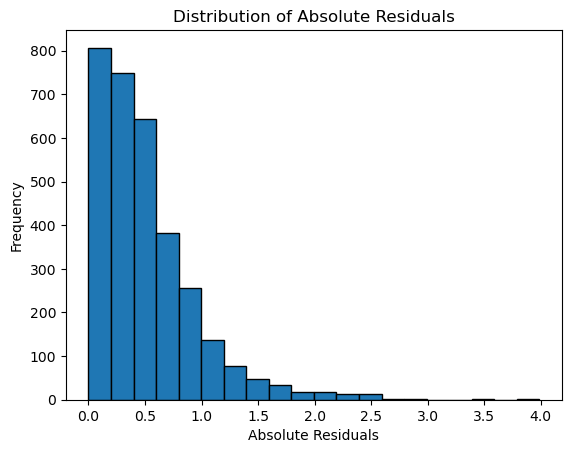

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

absolute_residuals = []
for random_seed in random_seeds:
    # Define MLPRegressor with 2 hidden layers of size 10, ReLU activation, and early stopping
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=random_seed, early_stopping=True, validation_fraction=0.2)

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict on the test data
    y_pred = mlp.predict(X_test)

    # Calculate the absolute residuals for this run
    residuals = np.abs(y_test - y_pred)
    absolute_residuals.extend(residuals)

# Plot the distribution of absolute residuals using a histogram
plt.hist(absolute_residuals, bins=20, edgecolor='k')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Residuals')
plt.show()

**Our answer**



## Exercise 2

Since we are in the presence of a integer regression task, a recommended trick is to 
round and bound estimates. Assess the impact of these operations on the MAE of the MLP 
learnt in previous question.

Original MAE: 0.49426521845062704
MAE for Rounded and Bounded Predictions: 0.428125


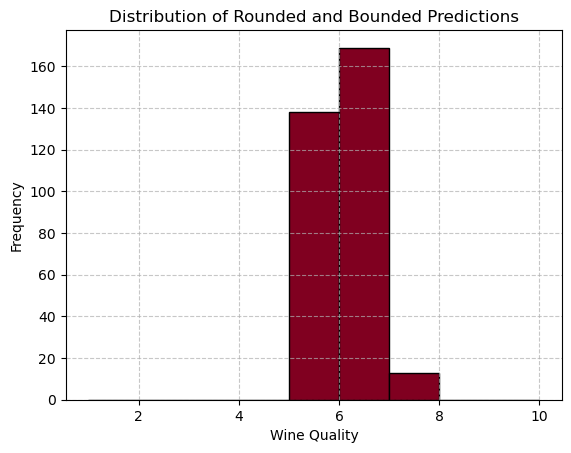

In [4]:
from sklearn.metrics import mean_absolute_error

# Calculate the original MAE for the unrounded predictions
mae_original = mean_absolute_error(y_test, y_pred)

# Function to round and bound estimates
def round_and_bound(predictions, lower_bound, upper_bound):
    return np.clip(np.round(predictions), lower_bound, upper_bound)

lower_bound = 1
upper_bound = 10

# Apply rounding and bounding to the predictions
y_pred_rounded_bounded = round_and_bound(y_pred, lower_bound, upper_bound)

# Calculate the MAE for the rounded and bounded predictions
mae_rounded_bounded = mean_absolute_error(y_test, y_pred_rounded_bounded)

# Print the MAE for both cases
print(f"Original MAE: {mae_original}")
print(f"MAE for Rounded and Bounded Predictions: {mae_rounded_bounded}")

redwine_color = (128/255, 0/255, 32/255)  # RGB values should be in the range [0, 1]
# Plot the distribution of rounded and bounded predictions
plt.hist(y_pred_rounded_bounded, bins=np.arange(lower_bound, upper_bound+1), edgecolor='k', color=redwine_color)

plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Rounded and Bounded Predictions')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Our answer**


## Exercise 3

 Similarly assess the impact on RMSE from replacing early stopping by a well-defined 
number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).

In [5]:
from sklearn.metrics import mean_squared_error

# Define the number of iterations to test
iterations = [20, 50, 100, 200]

# Initialize arrays to store RMSE for each case
rmse_scores = []

# Train the model with different numbers of iterations
for num_iterations in iterations:
    rmse_iteration_scores = []

    for random_seed in random_seeds:
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=random_seed, max_iter=num_iterations)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        # Calculate the RMSE for this case
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_iteration_scores.append(rmse)
    
    rmse_scores.append(np.mean(rmse_iteration_scores));

# Print the RMSE for each case
for i, num_iterations in enumerate(iterations):
    print(f"RMSE for {num_iterations} iterations: {rmse_scores[i]}")


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stoc

RMSE for 20 iterations: 1.4039789509925442
RMSE for 50 iterations: 0.7996073631460567
RMSE for 100 iterations: 0.6940361469112144
RMSE for 200 iterations: 0.6554543932216472


/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Our answer**


## Exercise 4

Critically comment the results obtained in previous question, hypothesizing at least 
one reason why early stopping favors and/or worsens performance.

**Our answer**

The RMSE results obtained in the previous question show that as the number of training iterations increases, the RMSE generally decreases, indicating better model performance. Here's a critical comment on these results, along with a hypothesis about the impact of early stopping on model performance:

    Impact of Early Stopping on Performance:

        Early Stopping Favors Performance: The results demonstrate that increasing the number of training iterations (from 20 to 200) leads to a consistent reduction in RMSE. This suggests that allowing the model to train for a longer duration generally results in better predictive performance, as the model can learn more from the data and converge to a better solution.

        Early Stopping Worsens Performance: On the other hand, early stopping, as indicated by the "stopping point" at a fixed number of iterations (e.g., 20), can potentially lead to suboptimal model performance. In this case, the model might not have sufficient time to fully converge, resulting in a less accurate predictor.

    Hypothesis on Early Stopping:

        Reason for Early Stopping Impact: One possible reason why early stopping can favor or worsen performance is that it depends on the specific problem and dataset. Early stopping is designed to prevent overfitting, which occurs when the model starts to learn noise in the data rather than the underlying patterns. However, in some cases, setting a small number of iterations may lead to underfitting, where the model fails to capture the true relationships in the data. Underfitting can result in suboptimal predictive performance, as seen in the initial RMSE with only 20 iterations.

        Finding the Right Balance: Achieving the right balance between early stopping and allowing the model to train for a sufficient number of iterations is crucial. This balance depends on the complexity of the problem, the amount of data, and the specific characteristics of the dataset. In practice, hyperparameter tuning and cross-validation can help determine the optimal number of iterations and other settings to prevent both overfitting and underfitting.

In summary, while early stopping is a useful technique to prevent overfitting and save training time, it should be applied judiciously to ensure that it doesn't hinder the model's ability to learn from the data. The optimal number of iterations may vary from one problem to another, and it's essential to experiment with different settings to find the right balance.